<a href="https://colab.research.google.com/github/ayssag/7DaysOfCodePandas/blob/main/_7DaysOfCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando dados

In [1]:
%%capture
!pip install pandas

In [2]:
repo = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas.git'
!git clone {repo}

Cloning into '7_Days_of_Code_Alura-Python-Pandas'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 282 (delta 29), reused 0 (delta 0), pack-reused 220 (from 1)
Receiving objects: 100% (282/282), 82.88 MiB | 6.67 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Updating files: 100% (33/33), done.


In [3]:
# Cores para os gráficos
GREEN = '#a0de59'
DARKERPURPLE = '#5f2a62'
PURPLE = '#a976c3'
GREEN = '#a0de59'
DARKERGREEN = '#466b5a'
YELLOW = '#f5c024'
MIDGREEN = '#59de96'
ORANGE = '#f57e24'
MIDPURPLE = '#2e2a62'

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

path = '7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets'

files = os.listdir(f'{path}/dados_emprestimos')
emprestimos = pd.DataFrame()

for file in files:
  add_emprestimos = pd.read_csv(f'{path}/dados_emprestimos/{file}')
  emprestimos = pd.concat([emprestimos, add_emprestimos], ignore_index=True)


In [5]:
files = os.listdir(path)
exemplares =  pd.read_parquet(f'{path}/dados_exemplares.parquet')

In [122]:
dataset = emprestimos.merge(exemplares, on='codigo_barras', how='left')

# Limpeza de dados

In [123]:
dataset = dataset.drop_duplicates()

In [124]:
dataset = dataset.drop(columns='registro_sistema')

In [125]:
columns_with_nan = dataset.isnull().any()
# data_renovacao, data_devolucao, matricula_ou_siape, id_exemplar, colecao, biblioteca, status_material, localizacao, registro_sistema

for col, _ in columns_with_nan.items():
  if col:
    dataset[col] = dataset[col].replace(float('nan'), 'unknown')


In [126]:
def convert_to_string(value):
  return str(value)

dataset['matricula_ou_siape'] = list(map(convert_to_string, dataset['matricula_ou_siape']))

In [127]:
columns_with_na = dataset.isna().any()
# localizacao
for col, _ in columns_with_na.items():
  if col:
    dataset[col] = dataset[col].replace(pd.NA, 'Não consta')


In [128]:
def convert_cdu(value):
  if value != 'unknown':
    match value:
      case value if float(value) >= 0 and float(value) <= 99:
        return 'Generalidades. Ciência e conhecimento.'
      case value if float(value) >= 100 and float(value) <= 199:
        return 'Filosofia e psicologia.'
      case value if float(value) >= 200 and float(value) <= 299:
        return 'Religião.'
      case value if float(value) >= 300 and float(value) <= 399:
        return 'Ciências sociais.'
      case value if float(value) >= 400 and float(value) <= 499:
        return 'Classe vaga. Provisoriamente não ocupada.'
      case value if float(value) >= 500 and float(value) <= 599:
        return 'Matemática e ciências naturais.'
      case value if float(value) >= 600 and float(value) <= 699:
        return 'Ciências aplicadas.'
      case value if float(value) >= 700 and float(value) <= 799:
        return 'Belas artes.'
      case value if float(value) >= 800 and float(value) <= 899:
        return 'Linguagem. Língua. Linguística.'
      case value if float(value) >= 900 and float(value) <= 999:
        return 'Geografia. Biografia. História.'
  else:
    return value

dataset['localizacao_cd'] = list(map(convert_cdu, dataset['localizacao']))

In [129]:
dataset['data_emprestimo'] = pd.to_datetime(dataset['data_emprestimo'])

# Análise exploratória de dados e DateTime

## Quantidade de exemplares emprestados por ano

In [14]:
exemplares_por_ano = dataset[['id_exemplar', 'data_emprestimo']]

In [15]:
exemplares_por_ano = exemplares_por_ano[exemplares_por_ano['data_emprestimo'] != 'unknown']
exemplares_por_ano = exemplares_por_ano[exemplares_por_ano['id_exemplar'] != 'unknown']

In [16]:
exemplares_por_ano['ano_emprestimo'] = exemplares_por_ano['data_emprestimo'].dt.year
exemplares_por_ano = exemplares_por_ano.drop(columns=['data_emprestimo'])
exemplares_por_ano = exemplares_por_ano.groupby('ano_emprestimo').describe()

<ipython-input-16-3ee92e6bf035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemplares_por_ano['ano_emprestimo'] = exemplares_por_ano['data_emprestimo'].dt.year


In [17]:
exemplares_por_ano = exemplares_por_ano['id_exemplar']['count']

In [18]:
exemplares_por_ano = exemplares_por_ano.to_frame()

In [19]:
exemplares_por_ano.columns = ['quantidade_exemplares']

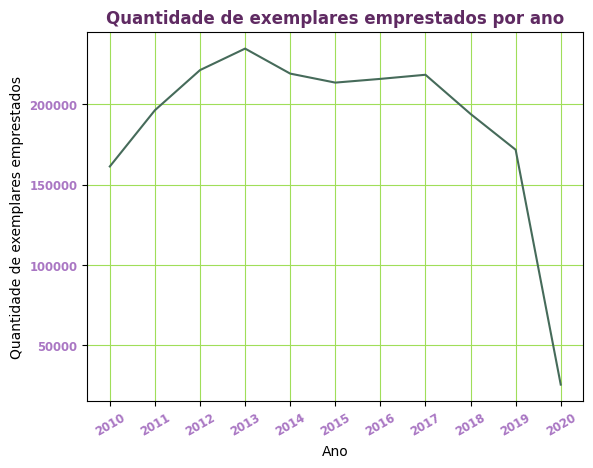

In [20]:
plt.plot(exemplares_por_ano, color=DARKERGREEN)
plt.title('Quantidade de exemplares emprestados por ano', fontweight='bold', color=DARKERPURPLE)
plt.xlabel('Ano')
plt.ylabel('Quantidade de exemplares emprestados')
plt.xticks(exemplares_por_ano.index, rotation=30, color=PURPLE, fontsize='small', fontweight='bold')
plt.yticks(color=PURPLE, fontsize='small', fontweight='bold')
plt.grid(visible=True, color=GREEN)
plt.show()

Podemos observar que a quantidade de exemplares emprestados por ano diminui entre os anos de 2010 e 2020. A tendência é que continue a diminuir ao longo dos próximos anos.

## Quantidade de exemplares emprestador por mês

In [21]:
exemplares_por_mes = dataset[['id_exemplar', 'data_emprestimo']]

In [22]:
exemplares_por_mes = exemplares_por_mes[exemplares_por_mes['data_emprestimo'] != 'unknown']
exemplares_por_mes = exemplares_por_mes[exemplares_por_mes['id_exemplar'] != 'unknown']

In [23]:
exemplares_por_mes['mes_emprestimo'] = exemplares_por_mes['data_emprestimo'].dt.month
exemplares_por_mes = exemplares_por_mes.drop(columns=['data_emprestimo'])
exemplares_por_mes = exemplares_por_mes.groupby('mes_emprestimo').describe()

<ipython-input-23-3ae6f540bce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemplares_por_mes['mes_emprestimo'] = exemplares_por_mes['data_emprestimo'].dt.month


In [24]:
exemplares_por_mes = exemplares_por_mes['id_exemplar']['count']
exemplares_por_mes = exemplares_por_mes.to_frame()

In [25]:
exemplares_por_mes.columns = ['quantidade_exemplares']

In [26]:
def num_to_mes(num):
  match num:
    case 1: return 'Janeiro'
    case 2: return 'Fevereiro'
    case 3: return 'Março'
    case 4: return 'Abril'
    case 5: return 'Maio'
    case 6: return 'Junho'
    case 7: return 'Julho'
    case 8: return 'Agosto'
    case 9: return 'Setembro'
    case 10: return 'Outubro'
    case 11: return 'Novembro'
    case 12: return 'Dezembro'

In [27]:
exemplares_por_mes.index = list(map(num_to_mes, exemplares_por_mes.index))

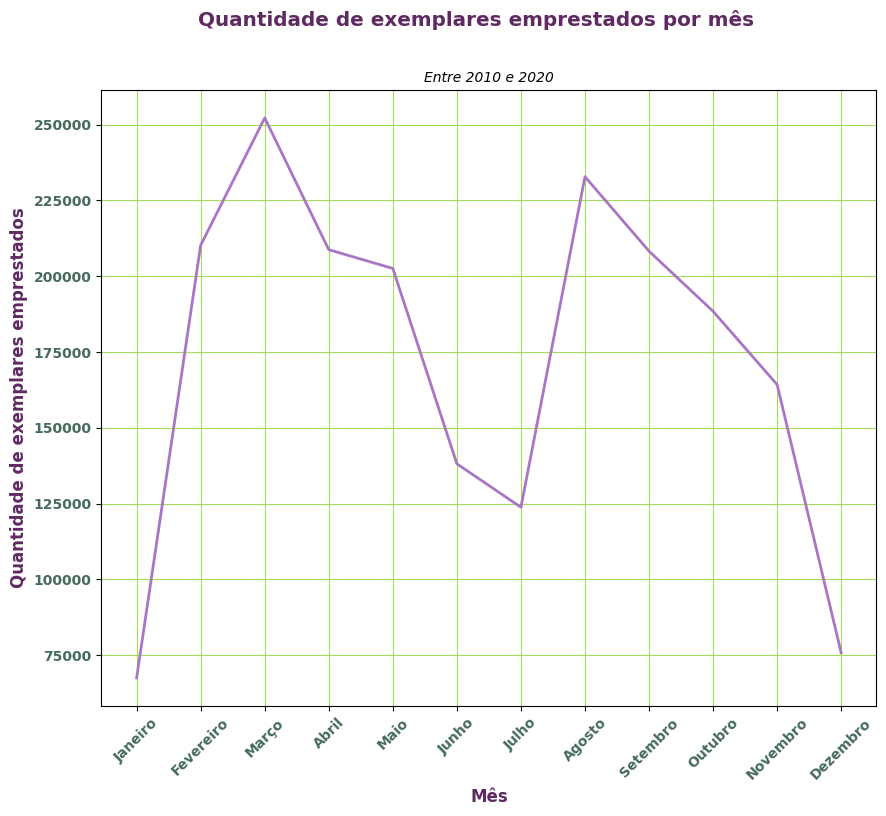

In [28]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(exemplares_por_mes, color=PURPLE, linewidth=2)

plt.suptitle('Quantidade de exemplares emprestados por mês', fontsize='x-large', fontweight='bold', color=DARKERPURPLE, ha='center')
plt.title('Entre 2010 e 2020', style='italic', fontsize='medium')

plt.xlabel('Mês', fontsize='large', fontweight='bold', color=DARKERPURPLE)
plt.ylabel('Quantidade de exemplares emprestados', fontsize='large', fontweight='bold', color=DARKERPURPLE)

plt.xticks(exemplares_por_mes.index, rotation=45, color=DARKERGREEN, fontsize='medium', fontweight='bold')
plt.yticks(color=DARKERGREEN, fontsize='medium', fontweight='bold')
plt.grid(visible=True, color=GREEN)
plt.show()

Podemos observar que o mês com maior número de exemplares emprestados entre 2010 e 2020 foi Março. Em comparação, o mês de Janeiro é o mês com menor demanda durante o período. Para alocar as férias dos funcionários de acordo com a demanda, este seria o mês ideal. O mês de dezembro tem a segunda menor quantidade de exemplares emprestados, sendo também um bom candidato para férias.

## Empréstimos por hora ao longo de um dia inteiro

In [29]:
emprestimos_por_hora = dataset[['id_emprestimo', 'data_emprestimo']]

In [30]:
emprestimos_por_hora = emprestimos_por_hora[emprestimos_por_hora['data_emprestimo'] != 'unknown']

In [31]:
emprestimos_por_hora['hora_emprestimo'] = emprestimos_por_hora['data_emprestimo'].dt.hour
emprestimos_por_hora = emprestimos_por_hora.drop(columns=['data_emprestimo'])
emprestimos_por_hora = emprestimos_por_hora.groupby('hora_emprestimo').describe()

In [32]:
emprestimos_por_hora = emprestimos_por_hora['id_emprestimo']['count']
emprestimos_por_hora = emprestimos_por_hora.to_frame()

In [33]:
emprestimos_por_hora.columns = ['quantidade_emprestimos']

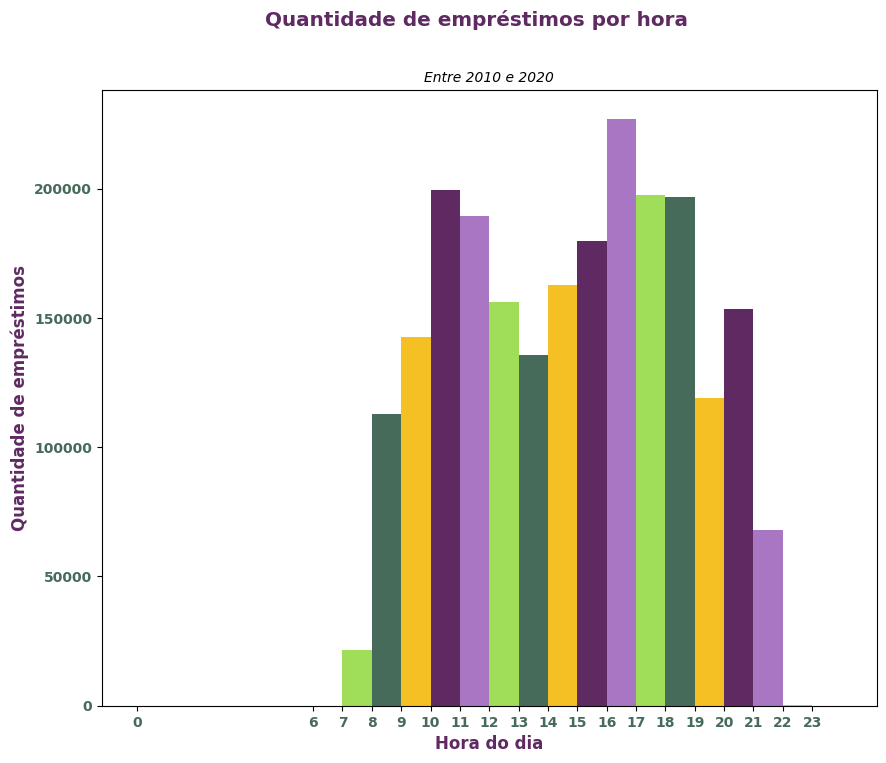

In [34]:

colors = [DARKERPURPLE, PURPLE, GREEN, DARKERGREEN, YELLOW]

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(emprestimos_por_hora.index, emprestimos_por_hora['quantidade_emprestimos'],align='edge', color=colors, width=1)

plt.suptitle('Quantidade de empréstimos por hora', fontsize='x-large', fontweight='bold', color=DARKERPURPLE, ha='center')
plt.title('Entre 2010 e 2020', style='italic', fontsize='medium', loc='center')

plt.xlabel('Hora do dia', color=DARKERPURPLE, fontsize='large', fontweight='bold')
plt.ylabel('Quantidade de empréstimos', color=DARKERPURPLE, fontsize='large', fontweight='bold')

plt.xticks(emprestimos_por_hora.index, fontsize='medium', color=DARKERGREEN, fontweight='bold')
plt.yticks(fontsize='medium', color=DARKERGREEN, fontweight='bold')


plt.show()

Podemos observar que os horários com maior atividade de atendimento ao usuário (quantidade de empréstimos) é às 10h e às 16h. Para alocar atividades que não envolvem atender clientes, é adequado escolher horários com pouca quantidade de empréstimos, como às 7h da manhã (início do expediente) ou 19h ou 21h da noite (fim do expediente).

## Análise exploratória de dados e Variáveis categóricas

In [35]:
def analise_variavel(variavel):
  emprestimos_por_variavel = dataset[['id_emprestimo', variavel]]
  emprestimos_por_variavel = emprestimos_por_variavel.groupby(variavel).describe()

  emprestimos_por_variavel = emprestimos_por_variavel['id_emprestimo']['count'].to_frame()
  emprestimos_por_variavel.columns = ['quantidade_emprestimos']
  emprestimos_por_variavel['quantidade_emprestimos'] = list(map(int,emprestimos_por_variavel['quantidade_emprestimos']))

  emprestimos_por_variavel = emprestimos_por_variavel.sort_values(by='quantidade_emprestimos', ascending=False)
  emprestimos_por_variavel['percentual'] = round(100*(emprestimos_por_variavel['quantidade_emprestimos']/emprestimos_por_variavel['quantidade_emprestimos'].sum()), 2)

  print('='*90)
  print(f'Tabela para {variavel}')
  print('='*90)
  print(emprestimos_por_variavel)

  # print(f'Visualização de {variavel}')
  # pizza(emprestimos_por_variavel, variavel)


In [36]:
variaveis = ['tipo_vinculo_usuario', 'localizacao_cd', 'status_material', 'colecao', 'biblioteca']

In [37]:
for variavel in variaveis:
  analise_variavel(variavel)

Tabela para tipo_vinculo_usuario
                                 quantidade_emprestimos  percentual
tipo_vinculo_usuario                                               
ALUNO DE GRADUAÇÃO                              1771903       78.34
ALUNO DE PÓS-GRADUAÇÃO                           320074       14.15
DOCENTE                                           78285        3.46
SERVIDOR TÉCNICO-ADMINISTRATIVO                   34178        1.51
ALUNO MÉDIO/TÉCNICO                               29986        1.33
DOCENTE EXTERNO                                   24606        1.09
USUÁRIO EXTERNO                                    2741        0.12
OUTROS                                                6        0.00
Tabela para localizacao_cd
                                        quantidade_emprestimos  percentual
localizacao_cd                                                            
Ciências aplicadas.                                    1425473       63.02
Ciências sociais.                  

* Como se distribuem os empréstimos de exemplares pelos tipos
de vínculo dos usuários?
* Quais coleções são mais emprestadas?
* Quais são as bibliotecas com mais ou menos quantidade de empréstimos?

# Análise exploratória de dados e Boxplot

## Distribuição de empréstimos mensais por ano para aluno de graduação e pós-graduação

In [38]:
colecao_por_tipo_usuario = dataset[['colecao', 'tipo_vinculo_usuario']]
colecao_por_tipo_usuario = colecao_por_tipo_usuario[colecao_por_tipo_usuario['colecao'] != 'unknown']

colecoes = list(colecao_por_tipo_usuario['colecao'].unique())

colecao_por_tipo_usuario = colecao_por_tipo_usuario[colecao_por_tipo_usuario['tipo_vinculo_usuario'].isin(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO'])]

In [39]:
colecao_por_tipo_usuario = colecao_por_tipo_usuario.groupby('tipo_vinculo_usuario')
colecao_por_tipo_usuario = pd.DataFrame(colecao_por_tipo_usuario.value_counts())

In [40]:
colecao_por_tipo_usuario.columns = ['quantidade_emprestimos']

In [41]:
tabela_colecao = colecao_por_tipo_usuario.loc['ALUNO DE GRADUAÇÃO']

In [42]:
tabela_colecao.sort_values(by='quantidade_emprestimos',ascending=False)


,quantidade_emprestimos
colecao,
Acervo Circulante,1600155
Multimeios,4652
Monografias,3572
Dissertações,1152
Obras de Referência,1047
Publicações de Autores do RN,595
Publicações da UFRN,466
Teses,245
Folhetos,180


In [43]:
tabela_colecao = colecao_por_tipo_usuario.loc['ALUNO DE PÓS-GRADUAÇÃO']
tabela_colecao.sort_values(by='quantidade_emprestimos',ascending=False)

,quantidade_emprestimos
colecao,
Acervo Circulante,299201
Dissertações,934
Obras de Referência,700
Multimeios,559
Teses,367
Monografias,278
Publicações de Autores do RN,204
Publicações da UFRN,121
Folhetos,60


A coleção com maior número de empréstimos é a Acervo Circulante, tanto para alunos de graduação quanto para alunos de pós-graduação.

In [44]:
emprestimos_por_mes = dataset[['id_emprestimo', 'data_emprestimo', 'colecao', 'tipo_vinculo_usuario']]
emprestimos_por_mes = emprestimos_por_mes[emprestimos_por_mes['colecao'] == 'Acervo Circulante']
emprestimos_por_mes = emprestimos_por_mes[emprestimos_por_mes['data_emprestimo'] != 'unknown']
emprestimos_por_mes = emprestimos_por_mes[emprestimos_por_mes['tipo_vinculo_usuario'].isin(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO'])]
emprestimos_por_mes = emprestimos_por_mes.drop(columns=['colecao']) #Coleção Acervo Circulante

### Alunos de graduação

In [45]:
emprestimos_por_mes_grad = emprestimos_por_mes[emprestimos_por_mes['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO']
# emprestimos_por_mes_pos = emprestimos_por_mes[emprestimos_por_mes['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO']

ano_emprestimo = emprestimos_por_mes_grad.loc[:,('data_emprestimo')].dt.year.to_list()
mes_emprestimo = emprestimos_por_mes_grad.loc[:,('data_emprestimo')].dt.month.to_list()

emprestimos_por_mes_grad.insert(2,column='ano_emprestimo', value=ano_emprestimo)
emprestimos_por_mes_grad.insert(2,column='mes_emprestimo', value=mes_emprestimo)


emprestimos_por_mes_grad.index = emprestimos_por_mes_grad['id_emprestimo']
emprestimos_por_mes_grad = emprestimos_por_mes_grad.drop(columns=['id_emprestimo', 'data_emprestimo', 'tipo_vinculo_usuario'])

In [46]:
anos = [ano for ano in range(2010, 2021)]
tabelas_por_ano = [
    emprestimos_por_mes_grad.loc[emprestimos_por_mes_grad['ano_emprestimo'] == ano].value_counts().to_list()
    for ano in anos
]

In [47]:
def num_to_mes(num):
  match num[0]:
    case 1: return 'Janeiro'
    case 2: return 'Fevereiro'
    case 3: return 'Março'
    case 4: return 'Abril'
    case 5: return 'Maio'
    case 6: return 'Junho'
    case 7: return 'Julho'
    case 8: return 'Agosto'
    case 9: return 'Setembro'
    case 10: return 'Outubro'
    case 11: return 'Novembro'
    case 12: return 'Dezembro'

In [48]:
valor_max = 0

for tabela in tabelas_por_ano:
  if max(tabela) > valor_max:
    valor_max = max(tabela)

valor_max

22797

In [49]:
emprestimos_por_mes_grad = emprestimos_por_mes[emprestimos_por_mes['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO']
# emprestimos_por_mes_pos = emprestimos_por_mes[emprestimos_por_mes['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO']

ano_emprestimo = emprestimos_por_mes_grad.loc[:,('data_emprestimo')].dt.year.to_list()
mes_emprestimo = emprestimos_por_mes_grad.loc[:,('data_emprestimo')].dt.month.to_list()

emprestimos_por_mes_grad.insert(2,column='ano_emprestimo', value=ano_emprestimo)
emprestimos_por_mes_grad.insert(2,column='mes_emprestimo', value=mes_emprestimo)


emprestimos_por_mes_grad.index = emprestimos_por_mes_grad['id_emprestimo']
emprestimos_por_mes_grad = emprestimos_por_mes_grad.drop(columns=['id_emprestimo', 'data_emprestimo', 'tipo_vinculo_usuario'])

In [50]:
anos = [ano for ano in range(2010, 2021)]
tabelas_por_ano = [
    emprestimos_por_mes_grad.loc[emprestimos_por_mes_grad['ano_emprestimo'] == ano].value_counts().to_list()
    for ano in anos
]

In [51]:
def num_to_mes(num):
  match num[0]:
    case 1: return 'Janeiro'
    case 2: return 'Fevereiro'
    case 3: return 'Março'
    case 4: return 'Abril'
    case 5: return 'Maio'
    case 6: return 'Junho'
    case 7: return 'Julho'
    case 8: return 'Agosto'
    case 9: return 'Setembro'
    case 10: return 'Outubro'
    case 11: return 'Novembro'
    case 12: return 'Dezembro'

In [52]:
valor_max = 0

for tabela in tabelas_por_ano:
  if max(tabela) > valor_max:
    valor_max = max(tabela)

valor_max

22797

In [53]:
y_ticks = [i for i in range(0, valor_max+1, 5000)]
y_ticks

[0, 5000, 10000, 15000, 20000]

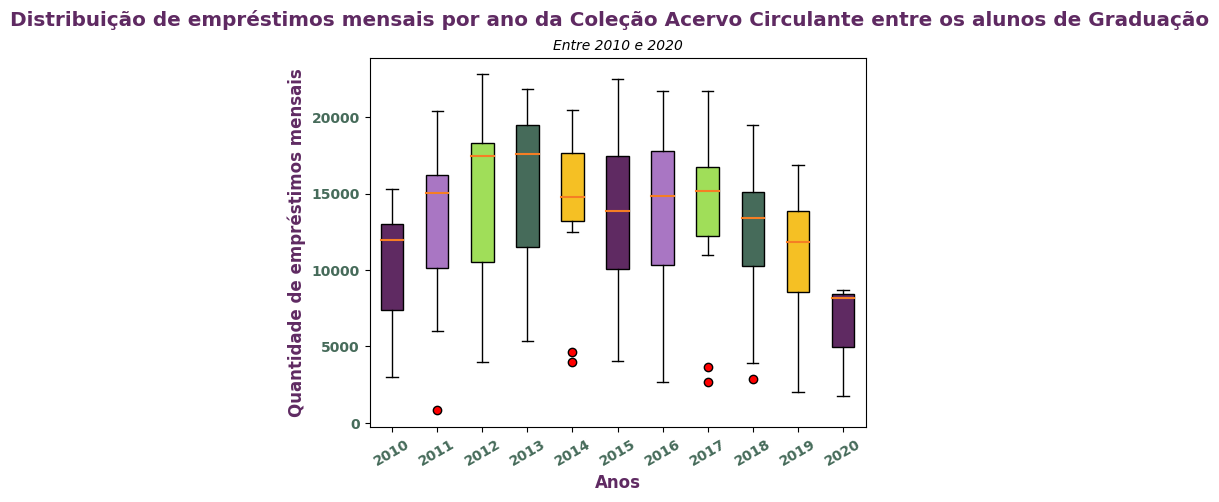

In [54]:
cores = [DARKERPURPLE, PURPLE, GREEN, DARKERGREEN, YELLOW, DARKERPURPLE, PURPLE, GREEN, DARKERGREEN, YELLOW, DARKERPURPLE]

fig, ax = plt.subplots()
bplot = ax.boxplot(tabelas_por_ano, labels=anos, patch_artist=True)

for bpatch, cor in zip(bplot['boxes'], cores):
    bpatch.set_facecolor(cor)

for media in bplot['medians']:
  media.set_color(ORANGE)
  media.set_linewidth(1.5)

for flier in bplot['fliers']:
    plt.setp(bplot["fliers"], markerfacecolor='red')

plt.xticks(color=DARKERGREEN, rotation=30, fontweight='bold')
plt.xlabel('Anos',fontsize='large', color=DARKERPURPLE, fontweight='bold')

plt.ylabel('Quantidade de empréstimos mensais', fontsize='large', color=DARKERPURPLE, fontweight='bold')
plt.yticks(y_ticks, color=DARKERGREEN, fontweight='bold')

plt.suptitle('Distribuição de empréstimos mensais por ano da Coleção Acervo Circulante entre os alunos de Graduação', fontsize='x-large', fontweight='bold', color=DARKERPURPLE)
plt.title('Entre 2010 e 2020', style='italic', fontsize='medium')

plt.show()

In [55]:
# emprestimos_por_mes_pos = emprestimos_por_mes[emprestimos_por_mes['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO']
emprestimos_por_mes_pos = emprestimos_por_mes[emprestimos_por_mes['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO']

ano_emprestimo = emprestimos_por_mes_pos.loc[:,('data_emprestimo')].dt.year.to_list()
mes_emprestimo = emprestimos_por_mes_pos.loc[:,('data_emprestimo')].dt.month.to_list()

emprestimos_por_mes_pos.insert(2,column='ano_emprestimo', value=ano_emprestimo)
emprestimos_por_mes_pos.insert(2,column='mes_emprestimo', value=mes_emprestimo)


emprestimos_por_mes_pos.index = emprestimos_por_mes_pos['id_emprestimo']
emprestimos_por_mes_pos = emprestimos_por_mes_pos.drop(columns=['id_emprestimo', 'data_emprestimo', 'tipo_vinculo_usuario'])

In [56]:
anos = [ano for ano in range(2010, 2021)]
tabelas_por_ano = [
    emprestimos_por_mes_pos.loc[emprestimos_por_mes_pos['ano_emprestimo'] == ano].value_counts().to_list()
    for ano in anos
]

In [57]:
valor_max = 0

for tabela in tabelas_por_ano:
  if max(tabela) > valor_max:
    valor_max = max(tabela)

valor_max

3927

In [58]:
y_ticks = [i for i in range(0, valor_max+1, 5000)]
y_ticks

[0]

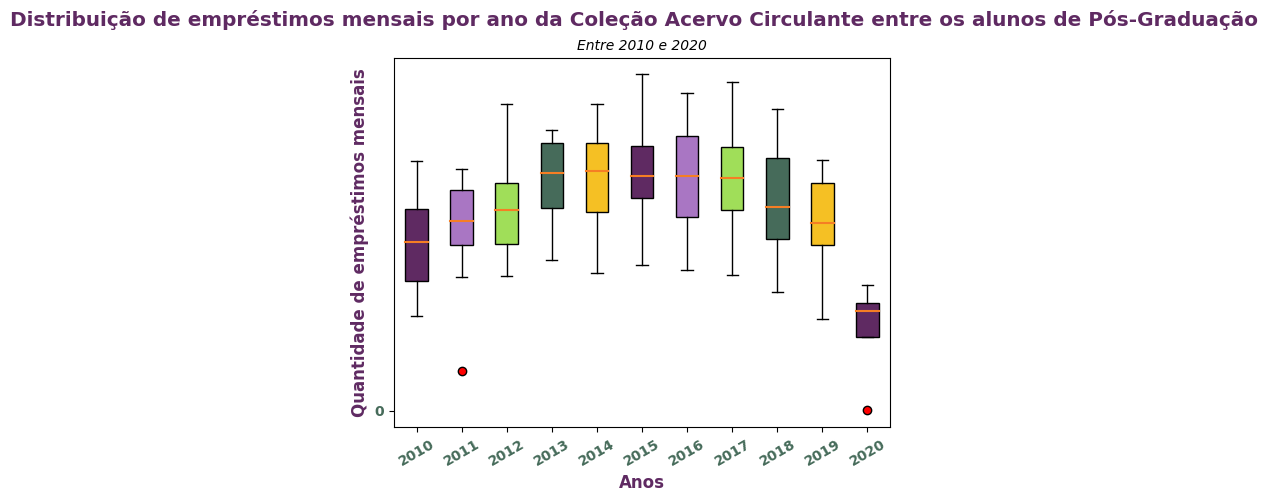

In [59]:
fig, ax = plt.subplots()
bplot = ax.boxplot(tabelas_por_ano, labels=anos, patch_artist=True)

for bpatch, cor in zip(bplot['boxes'], cores):
    bpatch.set_facecolor(cor)

for media in bplot['medians']:
  media.set_color(ORANGE)
  media.set_linewidth(1.5)

for flier in bplot['fliers']:
    plt.setp(bplot["fliers"], markerfacecolor='red')

plt.xticks(color=DARKERGREEN, rotation=30, fontweight='bold')
plt.xlabel('Anos',fontsize='large', color=DARKERPURPLE, fontweight='bold')

plt.ylabel('Quantidade de empréstimos mensais', fontsize='large', color=DARKERPURPLE, fontweight='bold')
plt.yticks(y_ticks, color=DARKERGREEN, fontweight='bold')

plt.suptitle('Distribuição de empréstimos mensais por ano da Coleção Acervo Circulante entre os alunos de Pós-Graduação', fontsize='x-large', fontweight='bold', color=DARKERPURPLE)
plt.title('Entre 2010 e 2020', style='italic', fontsize='medium')

plt.show()

# JSON, Excel e Pivot_table


In [60]:
import json

In [130]:
matricula_alunos = pd.read_excel("/content/7_Days_of_Code_Alura-Python-Pandas/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx", header=1)
cadastro_alunos = pd.read_json("https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_medium=email&_hsenc=p2ANqtz--eqLzri2o62ZKo-SB9yfXTYI5dABx33bKs-J8GoAdKlOKPdrglnnji5lNucQjqXbmHO6DX2Rs5qfiAdrGjHsyNe0YIrg&_hsmi=270881120&utm_content=270881120&utm_source=hs_automation")

In [131]:
matricula_alunos.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso_usuario']
matricula_alunos

,matricula_ou_siape,tipo_vinculo_usuario,curso_usuario
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2.009075e+09,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2.009075e+09,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2.009075e+09,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2.009075e+09,ALUNO DE GRADUAÇÃO,MÚSICA


In [116]:
cadastro_alunos_graduacao = cadastro_alunos.loc[cadastro_alunos['tipo_curso']=='GRADUACAO']
# cadastro_alunos_pos = cadastro_alunos.loc[cadastro_alunos['tipo_curso']=='POSGRADUACAO']
registros = cadastro_alunos_graduacao['registros'].loc[0]
registros = json.loads(registros)
registro_alunos_graduacao = pd.DataFrame(registros)
registro_alunos_graduacao['matricula_ou_siape'] = list(map(float, registro_alunos_graduacao['matricula_ou_siape']))
registro_alunos_graduacao.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso_usuario']
registro_alunos_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso_usuario
0,2.009029e+09,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,2.006173e+08,ALUNO DE GRADUAÇÃO,DIREITO
2,2.007465e+08,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,2.005050e+08,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,2.006156e+08,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,2.020001e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,2.020004e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,2.020013e+10,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,2.020001e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [117]:
# cadastro_alunos_graduacao = cadastro_alunos.loc[cadastro_alunos['tipo_curso']=='GRADUACAO']
cadastro_alunos_pos = cadastro_alunos.loc[cadastro_alunos['tipo_curso']=='POSGRADUACAO']
registros = cadastro_alunos_pos['registros'].loc[1]
registros = json.loads(registros)
registro_alunos_pos = pd.DataFrame(registros)
registro_alunos_pos['matricula_ou_siape'] = list(map(float, registro_alunos_pos['matricula_ou_siape']))
registro_alunos_pos.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso_usuario']
registro_alunos_pos

,matricula_ou_siape,tipo_vinculo_usuario,curso_usuario
0,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2.008107e+09,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2.011101e+09,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2.011113e+09,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2.010111e+09,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,2.020102e+10,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [118]:
cadastro_alunos = pd.concat([registro_alunos_graduacao, registro_alunos_pos])
cadastro_alunos

,matricula_ou_siape,tipo_vinculo_usuario,curso_usuario
0,2.009029e+09,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,2.006173e+08,ALUNO DE GRADUAÇÃO,DIREITO
2,2.007465e+08,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,2.005050e+08,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,2.006156e+08,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
19435,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,2.020102e+10,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [132]:
dataset = dataset.drop(dataset.loc[dataset['matricula_ou_siape']=='unknown'].index)
dataset = dataset.drop(dataset.loc[dataset['data_emprestimo']=='unknown'].index)
dataset['matricula_ou_siape'] = list(map(float, dataset['matricula_ou_siape']))
dataset = dataset.merge(pd.concat([matricula_alunos, cadastro_alunos]), on='matricula_ou_siape')

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario_x,id_exemplar,colecao,biblioteca,status_material,localizacao,localizacao_cd,tipo_vinculo_usuario_y,curso_usuario,tipo_curso,registros
0,1659561,2012039155,unknown,2014-01-02 10:37:37.234,2014/01/16 14:54:04.000000000,2.009050e+09,ALUNO DE GRADUAÇÃO,1011095.0,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,327.0,Ciências sociais.,ALUNO DE GRADUAÇÃO,ECOLOGIA,NaN,NaN
1,948711,2009056222,2011/04/01 15:34:58.925000000,2011-03-17 15:37:51.996,2011/04/14 16:45:52.000000000,2.009050e+09,ALUNO DE GRADUAÇÃO,765995.0,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,626.0,Ciências aplicadas.,ALUNO DE GRADUAÇÃO,ECOLOGIA,NaN,NaN
2,950860,2009035903,2011/04/01 15:34:58.892000000,2011-03-21 14:51:14.113,2011/04/14 15:53:38.000000000,2.009050e+09,ALUNO DE GRADUAÇÃO,274961.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,601.0,Ciências aplicadas.,ALUNO DE GRADUAÇÃO,ECOLOGIA,NaN,NaN
3,972408,2010033790,2011/04/29 16:25:44.470000000,2011-04-14 16:46:55.243,2011/05/27 16:19:36.000000000,2.009050e+09,ALUNO DE GRADUAÇÃO,797555.0,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,699.0,Ciências aplicadas.,ALUNO DE GRADUAÇÃO,ECOLOGIA,NaN,NaN
4,984143,L169848,unknown,2011-04-29 15:46:53.410,2011/05/06 14:27:55.000000000,2.009050e+09,ALUNO DE GRADUAÇÃO,unknown,unknown,unknown,unknown,unknown,unknown,ALUNO DE GRADUAÇÃO,ECOLOGIA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228563,1353700,L165779,2012/11/05 23:36:43.987000000,2012-10-18 16:46:37.089,2012/11/08 16:18:32.000000000,2.009053e+09,ALUNO DE GRADUAÇÃO,73334.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,660.0,Ciências aplicadas.,ALUNO DE GRADUAÇÃO,DANÇA,NaN,NaN
228564,1353701,2009011150,2012/11/05 23:31:39.532000000,2012-10-18 16:46:37.138,2012/11/08 16:18:22.000000000,2.009053e+09,ALUNO DE GRADUAÇÃO,261788.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,601.0,Ciências aplicadas.,ALUNO DE GRADUAÇÃO,DANÇA,NaN,NaN
228565,1364991,2008052628,2012/11/16 14:37:08.885000000,2012-11-01 16:36:03.416,2012/12/04 15:04:10.000000000,2.009053e+09,ALUNO DE GRADUAÇÃO,262777.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,602.0,Ciências aplicadas.,ALUNO DE GRADUAÇÃO,DANÇA,NaN,NaN
228566,773001,2009022176,unknown,2010-05-11 19:39:38.979,2010/05/26 20:10:16.912000000,2.008005e+09,ALUNO DE GRADUAÇÃO,111586.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,623.0,Ciências aplicadas.,ALUNO DE GRADUAÇÃO,ECOLOGIA,NaN,NaN


In [133]:
emprestimos_por_curso = dataset[['data_emprestimo','curso_usuario']]
emprestimos_por_curso.loc[:,'data_emprestimo'] = emprestimos_por_curso['data_emprestimo'].dt.year
qtd_emprestimos = emprestimos_por_curso.value_counts().to_frame().loc[:,'count']
emprestimos_por_curso = emprestimos_por_curso.merge(qtd_emprestimos, on=['data_emprestimo','curso_usuario']).drop_duplicates(ignore_index=True)
emprestimos_por_curso.columns = ['ano_emprestimo', 'curso_usuario', 'emprestimos']
emprestimos_por_curso

,ano_emprestimo,curso_usuario,emprestimos
0,2014,ECOLOGIA,310
1,2011,ECOLOGIA,3021
2,2010,ECOLOGIA,4456
3,2012,ECOLOGIA,1724
4,2014,AGRONOMIA,203
...,...,...,...
197,2019,ADMINISTRAÇÃO,2
198,2017,DIREITO,5
199,2019,ENGENHARIA AMBIENTAL,4
200,2018,ADMINISTRAÇÃO,4


In [134]:
import numpy as np
emprestimos_por_curso = emprestimos_por_curso.pivot(index='curso_usuario', columns='ano_emprestimo', values='emprestimos')
emprestimos_por_curso.replace(np.nan,0,inplace=True)
emprestimos_por_curso

ano_emprestimo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
curso_usuario,,,,,,,,,,,
ADMINISTRAÇÃO,4566.0,3095.0,1753.0,841.0,218.0,81.0,29.0,22.0,4.0,2.0,NaN
AGRONOMIA,4393.0,2787.0,1708.0,867.0,203.0,84.0,3.0,4.0,6.0,NaN,NaN
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,3954.0,2687.0,1565.0,708.0,300.0,127.0,28.0,16.0,11.0,NaN,NaN
BIBLIOTECONOMIA,3787.0,2560.0,1426.0,655.0,191.0,69.0,13.0,9.0,NaN,NaN,NaN
CIÊNCIA DA COMPUTAÇÃO,4296.0,3248.0,2010.0,1011.0,292.0,101.0,1.0,NaN,NaN,NaN,NaN
CIÊNCIAS BIOLÓGICAS,3996.0,2844.0,1642.0,848.0,305.0,143.0,55.0,43.0,15.0,12.0,3.0
CIÊNCIAS SOCIAIS,4018.0,2715.0,1483.0,724.0,326.0,120.0,15.0,12.0,NaN,NaN,NaN
COMUNICAÇÃO SOCIAL,3846.0,2970.0,1744.0,826.0,242.0,91.0,8.0,2.0,NaN,NaN,NaN
DANÇA,4694.0,3290.0,1840.0,908.0,413.0,153.0,31.0,44.0,27.0,14.0,NaN


In [140]:
emprestimos_por_curso = emprestimos_por_curso.loc[['BIBLIOTECONOMIA', 'CIÊNCIAS SOCIAIS', 'COMUNICAÇÃO SOCIAL', 'DIREITO']]
emprestimos_por_curso.replace(np.nan,0,inplace=True)
# Não tem Filosofia e Pedagogia

ano_emprestimo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
curso_usuario,,,,,,,,,,,
BIBLIOTECONOMIA,3787.0,2560.0,1426.0,655.0,191.0,69.0,13.0,9.0,NaN,NaN,NaN
CIÊNCIAS SOCIAIS,4018.0,2715.0,1483.0,724.0,326.0,120.0,15.0,12.0,NaN,NaN,NaN
COMUNICAÇÃO SOCIAL,3846.0,2970.0,1744.0,826.0,242.0,91.0,8.0,2.0,NaN,NaN,NaN
DIREITO,4085.0,2689.0,1626.0,757.0,263.0,91.0,20.0,5.0,NaN,NaN,NaN


In [142]:
emprestimos_por_curso.loc['Total',:] = emprestimos_por_curso.sum(axis=0)
emprestimos_por_curso.loc[:,'Total'] = emprestimos_por_curso.sum(axis=1)

emprestimos_por_curso

ano_emprestimo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
curso_usuario,,,,,,,,,,,,
ADMINISTRAÇÃO,4566.0,3095.0,1753.0,841.0,218.0,81.0,29.0,22.0,4.0,2.0,0.0,10611.0
AGRONOMIA,4393.0,2787.0,1708.0,867.0,203.0,84.0,3.0,4.0,6.0,0.0,0.0,10055.0
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,3954.0,2687.0,1565.0,708.0,300.0,127.0,28.0,16.0,11.0,0.0,0.0,9396.0
BIBLIOTECONOMIA,3787.0,2560.0,1426.0,655.0,191.0,69.0,13.0,9.0,0.0,0.0,0.0,8710.0
CIÊNCIA DA COMPUTAÇÃO,4296.0,3248.0,2010.0,1011.0,292.0,101.0,1.0,0.0,0.0,0.0,0.0,10959.0
CIÊNCIAS BIOLÓGICAS,3996.0,2844.0,1642.0,848.0,305.0,143.0,55.0,43.0,15.0,12.0,3.0,9906.0
CIÊNCIAS SOCIAIS,4018.0,2715.0,1483.0,724.0,326.0,120.0,15.0,12.0,0.0,0.0,0.0,9413.0
COMUNICAÇÃO SOCIAL,3846.0,2970.0,1744.0,826.0,242.0,91.0,8.0,2.0,0.0,0.0,0.0,9729.0
DANÇA,4694.0,3290.0,1840.0,908.0,413.0,153.0,31.0,44.0,27.0,14.0,0.0,11414.0
